Directions: The exam is open book, notes, course materials, and internet, BUT if you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code: during the exam time, with students in other sections of the course, by using the solutions to exams from previous semesters, or online answer tools such as Chegg, CourseHero, ChatGPT, etc. This is a zero tolerance policy and all suspected honor code violations will be reported. Just as with all course assignments, you should submit this exam to Gradescope as a Jupyter Notebook with the ipynb file extension. To receive full credit, you should show and run all of your code used to answer each question.

**Check your file on Gradescope to ensure that it is the file that you intended to submit! No completed work ill be accepted after the due date and time.**

Run the cell below to set up the notebook.

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats


# User car Dealership

(What model was your first car?)

As of August 2004, a large Toyota car dealership offers purchasers of new Toyota cars the option to buy their used car as part of a trade-in. The dealer then sells the used cars for a small profit. The `ToyotaCorolla.csv` data includes the sales price and other information on the used cars, such as its age, mileage, fuel type, and engine size. A description of each of these variables is provided below. The total number of records in the dataset is 718 Toyota cars in the inventory.

Variables              | Descriptions
---------------------- | -----------------------------------------------------
_Price_                | Offer Price in EUROs
_Age_08_04_            | Age in months as in August 2004
_Mfg_Year_             | Year of Manufacture of the car
_KM_                   | Accumulated Kilometers on odometer
_Automatic_            | Automatic ( (Yes=1, No=0)
_Boardcomputer_        | Boardcomputer (Yes=1, No=0)free form of SO2  (prevents microbial growth and the oxidation of wine)
_Sport_Model_          | Sport Model  (Yes=1, No=0)
_Cylinders_            | Number of cylinders
_Central_Lock_         | Central Lock  (Yes=1, No=0)
_Power_Steering_       | Power Steering  (Yes=1, No=0)
_Weight_               | Weight in Kilograms
_Parking_Assistant_    | Parking assistance system  (Yes=1, No=0)
_ABS_                  | Anti-Lock Brake System (Yes=1, No=0)
_Fuel_Type_            | Fuel Type (Petrol, Diesel, CNG)

In [2]:
# Run this cell to load the data set and select only the variables of interest.

toyota = Table.read_table('ToyotaCorolla.csv').select(
    ['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'Automatic',
    'Boardcomputer', 'Sport_Model', 'Cylinders',
    'Central_Lock', 'Power_Steering', 'Weight', 'Parking_Assistant',
    'Weight','Parking_Assistant', 'ABS', 'Fuel_Type'])
toyota.take(np.arange(5))

Price,Age_08_04,Mfg_Year,KM,Automatic,Boardcomputer,Sport_Model,Cylinders,Central_Lock,Power_Steering,Weight,Parking_Assistant,ABS,Fuel_Type
13750,23,2002,72937,0,1,0,4,1,1,1165,0,1,Diesel
14950,26,2002,48000,0,1,0,4,0,1,1165,0,1,Diesel
12950,32,2002,61000,0,1,0,4,1,1,1170,0,1,Diesel
18600,30,2002,75889,0,1,0,4,1,1,1245,0,1,Diesel
12950,23,2002,71138,0,1,0,4,0,1,1105,0,1,Diesel


## Question 1

A customer is interested in purchasing a used car at the dealership but is unsure of how much she should plan to spend on the purchase on average. On arrival at the dealership, she asks the the manager at the dealership: "Based on the data you have on used cars in the inventory, what is the typical price of a used car in your lot?". Using the data above, and to answer the question posed, a statistical analyst is interested in generating a suitable plot of the distribution of the prices in the data.

Plot a histogram of the `Price` of all cars in the data set. Use the `toyota_bins` provided below. Then describe the shape of the histogram.

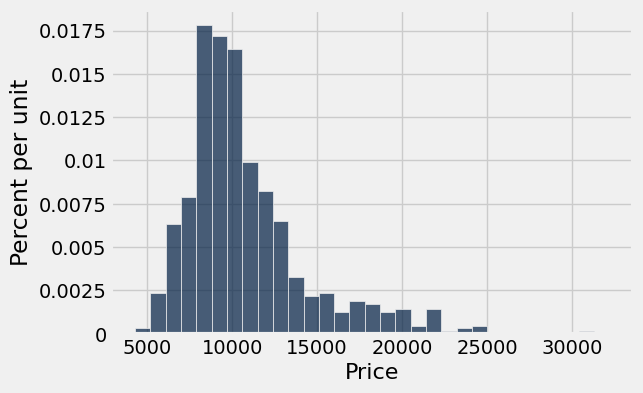

In [3]:
toyota_bins = np.arange(4300, 33000, 900)
toyota.hist("Price", bins = toyota_bins)



The histogram is right skewed and centered at around 9000. We can see from the distribution that there're more inexpensive cars than expensive cars.

## Question 2

Based on the shape of the histogram, compute and output the values of the appropriate `measure of center` and `measure of spread` of the distribution of prices of all used cars? Provide a reasonable reason for your choice of measures.

In [4]:
# Measure of center
measure_of_center = np.median(toyota.column("Price"))
measure_of_center

9900.0

In [5]:
# Measure of spread
measure_of_spread = percentile(75, toyota.column("Price")) - percentile(25, toyota.column("Price"))
measure_of_spread

3450

Becuase the shape of the histogram is right-skewed. The mean is not a good measure of center since it may be pulled in the direction of the long tail presented in the distribution. In addition, the median is a robust statistic against the undue influence of outliers. The reason of using IQR as measure of spread is the same, which will not be greatly affected by the long tail of the skewed distribution of data.

## Question 3

Construct a 90% confidence interval for the median price of all used car prices who characteristics are provided in the data set. To receive full credit you should: 
   
   * take bootstrap samples from the original sample, 
   * find your bootstrap statistic, repeat 5000 times, and 
   * determine the upper and lower bounds of the confidence interval. 
   * provide an interpretation of the 90% confidence interval you just computed.
   
You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! Only python code that align with functions and methods taught in class are acceptable. 

In [6]:

def one_bootstrap_median():
    single_sample = toyota.sample(with_replacement=True)
    return np.median(single_sample.column('Price'))

bootstrap_medians = make_array()

for i in np.arange(5000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

upper_bound = percentile(95, bootstrap_medians)
lower_bound = percentile(5, bootstrap_medians)


The interpretation of this confidential interval is that if we repeat this sampling process many times, in this case, bootstrapping 5000 times, 90% of the calculated confidence intervals from those samples would contain the true median price of all used Toyota cars. The upper and lower bounds calculated give us the range where the true median is likely to fall.

## Question 4

Before personally visiting the car dealership, an individual assumed that the typical price of a used car at this dealership is about $\$8000$. 

Does this confidence interval provide evidence in support of this assumption at the 0.05 significance level?  Why do you so answer?

This confidence interval does not provide evidence in support of this assumption at the 0.05 significance level, since the number 8000 is not included within the confidence interval we obtained. In addition, for a 0.05 significance level, a 90% confidence interval will not be enough for us to interpret the 0.05 significance level, we need a 95% confidence interval.

## Question 5

Depending on the model of a car and the year of manufacture, used car prices can vary. As of August 2004, the manager of the car dealership where the `ToyotaCorolla.csv` data set was collected has Toyota cars with different years of manufacture(in particular, cars manufactured in the categories of the years 1998 - 2004). To meet different customer needs for used cars, the manager of the Toyota car dealership offering the promotion claims that he maintains the following inventory proportions of Toyota cars by `Year of manufacture(MFG_Year)`: 1998(22%), 1999(28%), 2000(11%), 2001(8%), 2002(10%), 2003(9%), and 2004(12%). 

The goal of this problem is to assess whether the actual observed proportions of toyota cars in the `ToyotaCorolla.csv` data set, grouped by `Year of manufacture(MFG_Year)`, supports the manager's claim or represents a significant departure from the claim. To do this, we need to simulate multiple proportions of the cars under the model of random selection and see what the simulations predict. In other words, our goal is to test the null hypothesis that the current dealership inventory is randomly selected from a population with the multiple categories of `Year of manufacture(MFG_Year)` and having the proportions stated above. We need a statistic that will help us assess whether or not the model of random selection is supported by the data.

Use the following hypotheses:

**Null Hypothesis:** The proportions of used Toyota cars by year of manufacture shows that the data is a random sample drawn from a population having the proportions claimed by the manager.
    
**Alternative Hypothesis**: The proportions of used Toyota cars by year of manufacture `does not` show that the data is a random sample drawn from a population having the proportions claimed by the manager.

To receive full credit you should:

1. Choose an appropriate test statistic

2. Find the value of the observed test statistic

3. Shuffle the labels of the original sample, find your simulated test statistic, and repeat at least **500 times**

4. Plot your simulated test statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! Only python code that align with functions and methods taught in class are acceptable. 

0.0

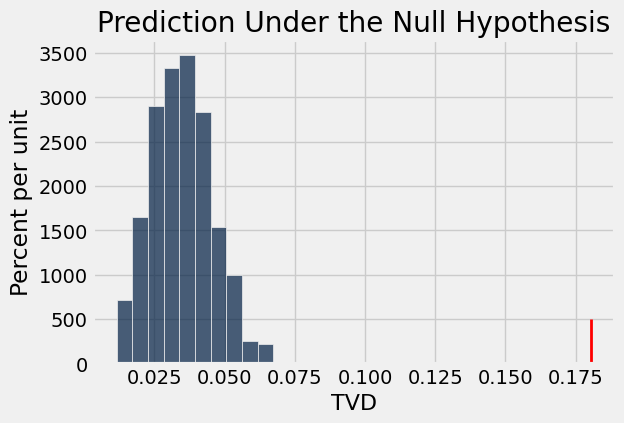

In [10]:
Year = Table().with_columns(
    "Mfg_Year", make_array(1998, 1999, 2000, 2001, 2002, 2003, 2004),
    "Proportion", make_array(0.22, 0.28, 0.11, 0.08, 0.1, 0.09, 0.12),
    "Data_Proportion", toyota.group("Mfg_Year").sort("Mfg_Year").column(1) / toyota.num_rows
)

def tvd(distribution_1, distribution_2):
    return sum(abs(distribution_1 - distribution_2))/2

observed_tvd = tvd(Year.column(1), Year.column(2))

def one_simulation():
    one_sample = sample_proportions(toyota.num_rows, Year.column("Proportion"))
    return tvd(Year.column(1), one_sample)   
differences = make_array()

for i in np.arange(500):
    new_difference = one_simulation()
    differences = np.append(differences, new_difference)

Table().with_column('TVD', differences).hist()
plots.title('Prediction Under the Null Hypothesis')
plots.plot([observed_tvd, observed_tvd], [0, 5], color='red', lw=2)

p_value = sum(differences >= observed_tvd)/500
p_value


Based on the p-value, which is smaller than the conventional cutoff of 0.05, we will reject the null hypothesis, so the proportions of used Toyota cars by year of manufacture `does not` show that the data is a random sample drawn from a population having the proportions claimed by the manager.

## Question 6

Are used, `sports-model` Toyota cars(_Sport_Model=1_) on the lot more expensive than Toyota cars that are not `sports-model`(_Sport_Model=0_)? 

Does this data suggest that the mean price of used, sports-model Toyota cars is higher than those that are not sports-model? The *Sport_ Model* variable in the data set is used to characterize where a Toyota car is a sports model or not. 

Perform a hypothesis test (at the 0.05 significance level) to examine this claim. For the test statistic, use the average price of sports model Toyota cars(_Sport_Model=1_) minus the average price of Toyota cars that are not of the sports model(_Sport_Model=0_). 

*Do not reinvent the wheel. You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! Only python code that align with functions and methods taught in class are acceptable.*

**To receive full credit you should:**

1. Choose an appropriate test statistic

2. Find the value of the observed test statistic

3. Shuffle the labels of the original sample, find your simulated test statistic, and repeat at least **1000 times**

4. Plot your simulated test statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

0.0


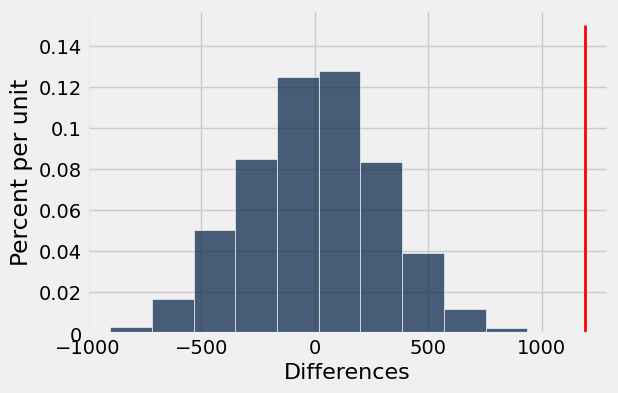

In [8]:
sport_model = toyota.select("Price", "Sport_Model")


def mean_difference(tbl):
    return np.mean(tbl.where("Sport_Model", are.equal_to(1)).column("Price")) - np.mean(tbl.where("Sport_Model", are.equal_to(0   )).column("Price"))

observed_value = mean_difference(toyota)

def one_simulation():
    shuffled_lables = toyota.sample(with_replacement= False).column("Sport_Model")
    
    shuffled_table = toyota.select("Price").with_columns(
        "Sport_Model", shuffled_lables
    )
    return mean_difference(shuffled_table)

difference = make_array()
for i in np.arange(1000):
    difference = np.append(difference, one_simulation())

Table().with_column("Differences", difference).hist("Differences")
plots.plot([observed_value, observed_value], [0, 0.0015], color='red', lw=2)

p_value = sum(difference >= observed_value) / 1000
print(p_value)

The p-value calculated is less than the conventional 5% cutoff, so based on the p-value we will reject the null hypothesis. The mean price of used, sports-model Toyota cars is not higher than those that are not sports-model.